In [1]:
import numpy as np

# 레이블
y = np.array(['N','N','Y','Y','Y','N','Y','N','Y','Y','Y','Y','Y','N'])

# 각 feature를 숫자화
weather = np.array(['맑음','맑음','흐림','비','비','비','흐림','맑음','맑음','비','맑음','흐림','흐림','비'])
temp    = np.array(['고','고','고','중','저','저','저','중','저','중','중','중','고','중'])
humid   = np.array(['고','고','고','정상','정상','정상','정상','고','정상','정상','정상','고','정상','고'])
wind    = np.array(['약','강','약','약','약','강','강','약','약','약','강','강','약','강'])

# 전체 feature 모으기
X = np.stack([weather, temp, humid, wind], axis=1)

# 인코딩 함수
def encode_feature(feature):
    unique = sorted(np.unique(feature))
    mapping = {val: i for i, val in enumerate(unique)}
    return np.array([mapping[val] for val in feature])

# X 인코딩
X_encoded = np.stack([encode_feature(X[:, i]) for i in range(X.shape[1])], axis=1)

# y 인코딩
y_encoded = np.array([1 if val == 'Y' else 0 for val in y])

# 엔트로피 함수
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

# 전체 엔트로피
total_entropy = entropy(y_encoded)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

# 각 피처별 정보이득 계산
for feature_idx in range(X_encoded.shape[1]):
    feature_values = np.unique(X_encoded[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        idx = X_encoded[:, feature_idx] == value
        subset_y = y_encoded[idx]
        weight = len(subset_y) / len(y_encoded)
        feature_entropy += weight * entropy(subset_y)
    info_gain = total_entropy - feature_entropy
    print(f"Feature {feature_idx}의 정보 이득: {info_gain:.4f}")

전체 데이터 엔트로피: 0.9403
Feature 0의 정보 이득: 0.2467
Feature 1의 정보 이득: 0.0292
Feature 2의 정보 이득: 0.2361
Feature 3의 정보 이득: 0.0481


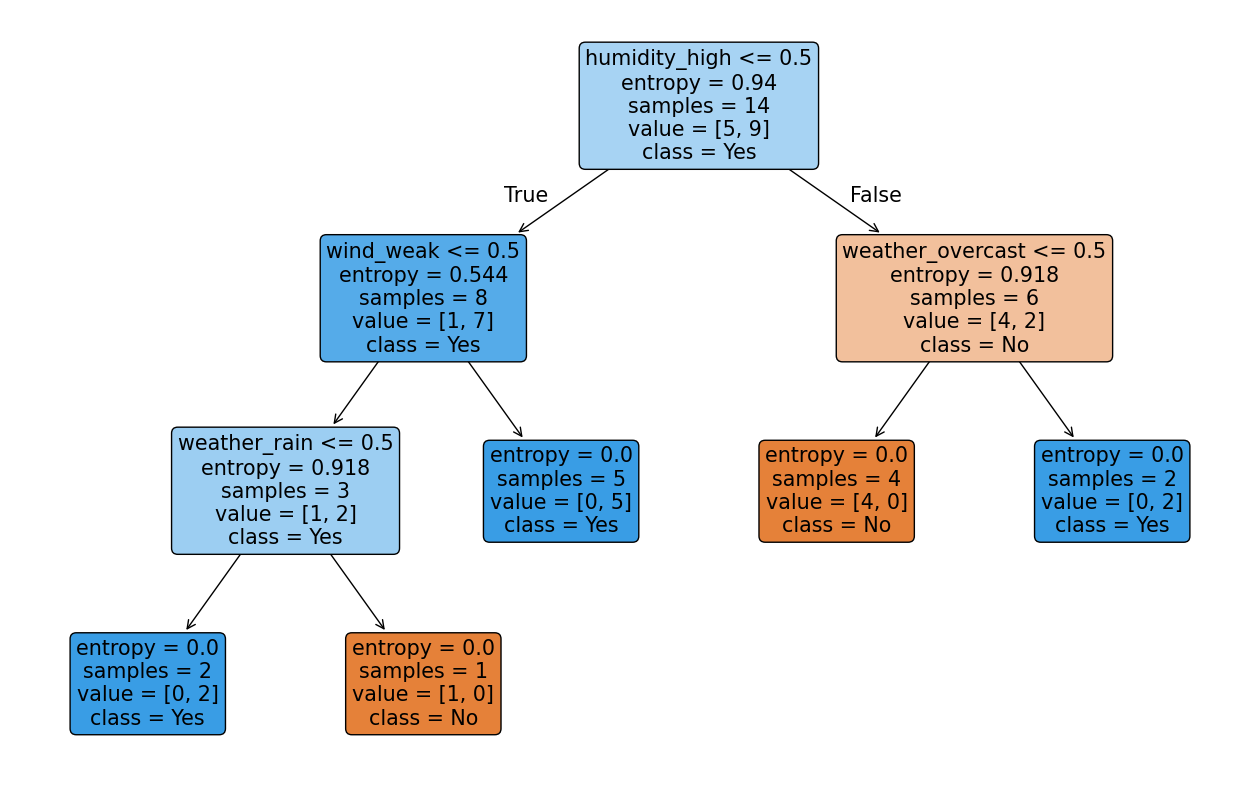

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. 원본 데이터 (한글)
data = {
    'weather': ['sunny','sunny','overcast','rain','rain','rain','overcast','sunny','sunny','rain','sunny','overcast','overcast','rain'],
    'temperature': ['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild'],
    'humidity': ['high','high','high','normal','normal','normal','normal','high','normal','normal','normal','high','normal','high'],
    'wind': ['weak','strong','weak','weak','weak','strong','strong','weak','weak','weak','strong','strong','weak','strong'],
    'play': ['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
}
df = pd.DataFrame(data)

# 2. One-hot encoding
X = pd.get_dummies(df.drop('play', axis=1))  # feature 인코딩
y = df['play'].map({'no': 0, 'yes': 1})       # label 인코딩

# 3. 모델 학습
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# 4. 트리 시각화 (한글 제외, 영어 출력만)
plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=X.columns,    # 영어 변수명 출력
    class_names=['No', 'Yes'],  # 라벨 출력
    filled=True,
    rounded=True
)
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-14-793878332f0a>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
<ipython-input-14-793878332f0a>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
<ipython-input-14-793878332f0a>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

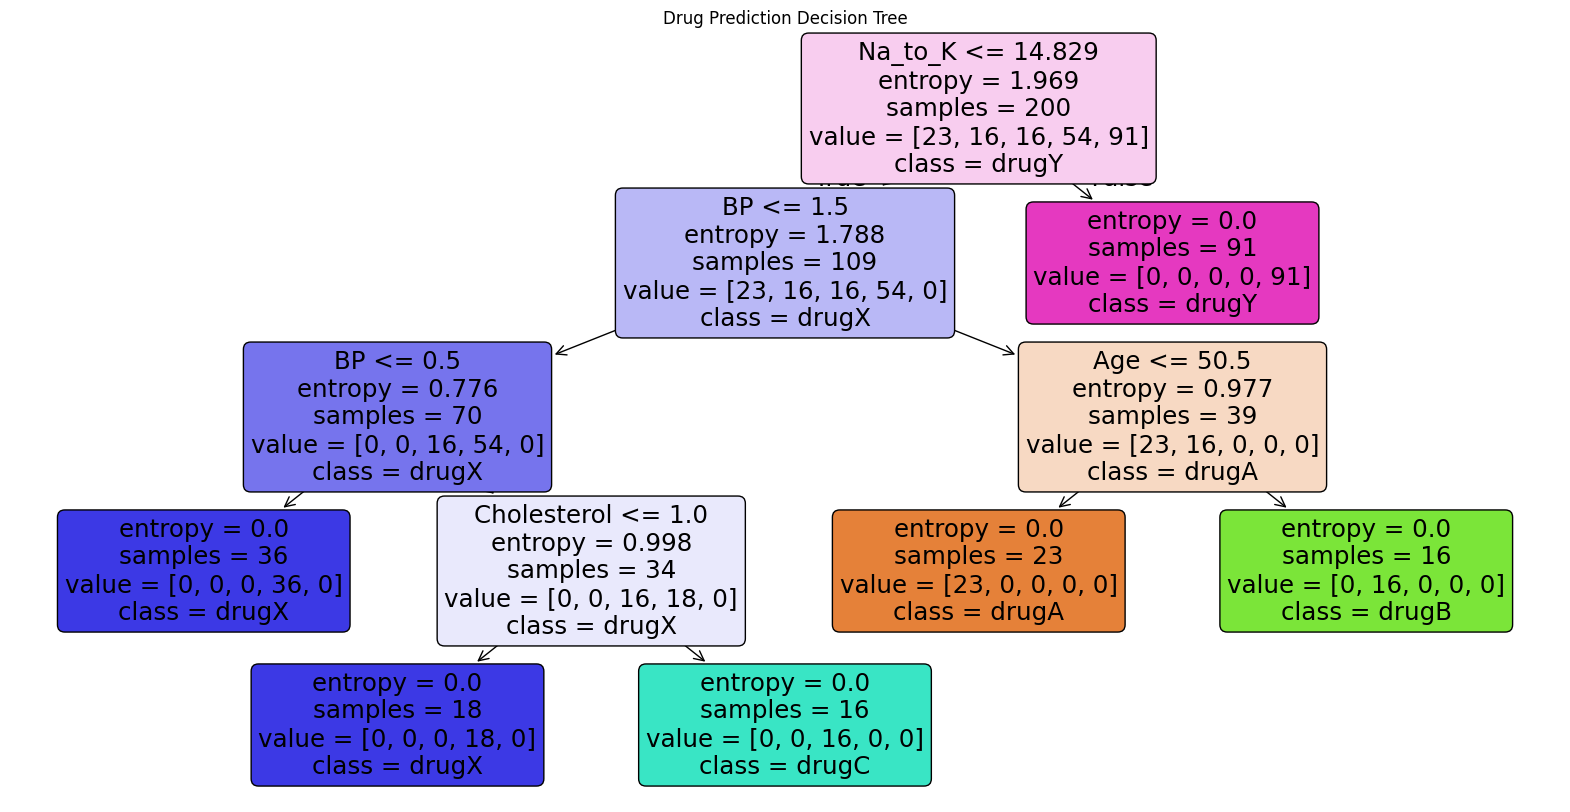

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. CSV 파일 읽기 (경로는 Drive 내 위치로 수정)
df = pd.read_csv('/content/drive/MyDrive/drive/drug200.csv')

# 2. 카테고리 값을 수치형으로 인코딩 (업로드한 코드 사용)
df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Drug'] = df['Drug'].replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})

# 3. Feature, Label 분리
X = df.drop('Drug', axis=1)
y = df['Drug']

# 4. 모델 학습
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# 5. 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],  # 실제 인코딩과 매칭
    filled=True,
    rounded=True
)
plt.title("Drug Prediction Decision Tree")
plt.show()